# Name: Siri Kavuturi

# Task: Email sms spam classifier

In [7]:
#!pip install nltk

In [8]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('C:/Users/kavut/Downloads/spam.csv',encoding='Windows-1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4679,ham,"That's cool he'll be here all night, lemme kno...",NaN,NaN,NaN
2180,ham,Babe ! How goes that day ? What are you doing ...,NaN,NaN,NaN
1936,ham,My planning usually stops at \find hella weed,"smoke hella weed\""""",NaN,NaN
2320,ham,This pain couldn't have come at a worse time.,NaN,NaN,NaN
60,ham,Your gonna have to pick up a $1 burger for you...,NaN,NaN,NaN


# Data cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
4301,ham,Aiyar hard 2 type. U later free then tell me t...
2505,ham,Congrats kano..whr s the treat maga?
589,ham,"I'm in a meeting, call me later at"
428,ham,7 at esplanade.. Do Ì_ mind giving me a lift c...
2424,ham,Oh k k:)but he is not a big hitter.anyway good


In [12]:
#RENAMING THE COLUMN NAMES
df.rename(columns={'v1':'target','v2':'mails'},inplace=True)
df.sample(5)

,target,mails
4121,ham,Doc prescribed me morphine cause the other pai...
187,spam,Please call our customer service representativ...
290,ham,Hey you told your name to gautham ah?
920,ham,When u wana see it then
3100,ham,Pathaya enketa maraikara pa'


In [13]:
# SETTING 0-HAM 1-SPAM MAILS USING LABELENCODER
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,mails
3260,0,Yup i'm still having coffee wif my frens... My...
419,1,Send a logo 2 ur lover - 2 names joined by a h...
5178,1,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
1727,0,I went to project centre
2179,0,And popping &lt;#&gt; ibuprofens was no help.


In [14]:
#Check missing values
df.isnull().sum()

target    0
mails     0
dtype: int64

In [15]:
#Check duplicate values (rows)
df.duplicated().sum()

403

In [16]:
# Remove duplicated values by keeping first occurence only
df=df.drop_duplicates(keep='first')
df.duplicated().sum() # all duplicate rows removed

0

# Exploratory Data Analysis(EDA)

In [17]:
df['target'].value_counts()
# 0- ham 1- spam

target
0    4516
1     653
Name: count, dtype: int64

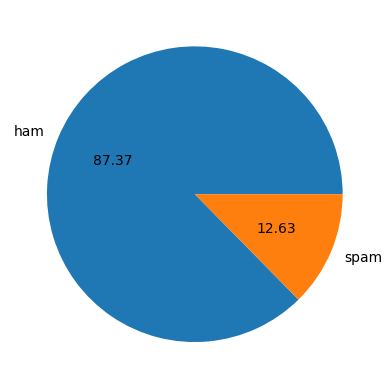

In [18]:
# to visualize nicely target column
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
# downloading dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANASA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['char_count']=df['mails'].apply(len)
df['words_count']=df['mails'].apply(lambda x:len(nltk.word_tokenize(x)))
df['sent_count']=df['mails'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,target,mails,char_count,words_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df.describe()

,target,char_count,words_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
# HAM
df[df['target']==0][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# SPAM
df[df['target']==1][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
# plot histogram for both category
import seaborn as sns

<Axes: xlabel='char_count', ylabel='Count'>

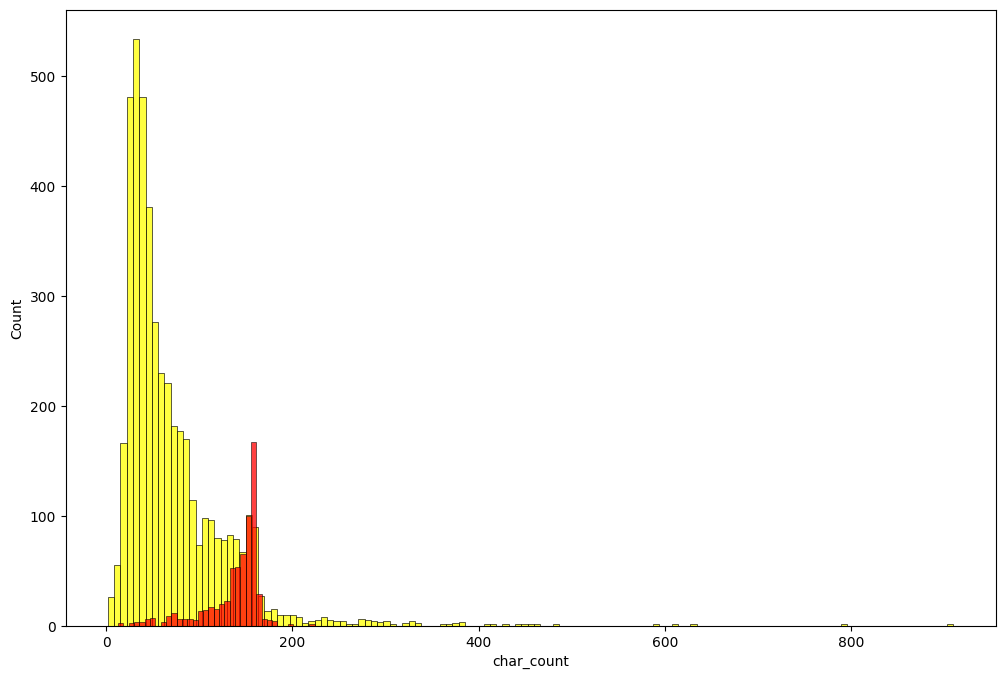

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['char_count'],color='yellow')
sns.histplot(df[df['target']==1]['char_count'],color='red')

<Axes: xlabel='words_count', ylabel='Count'>

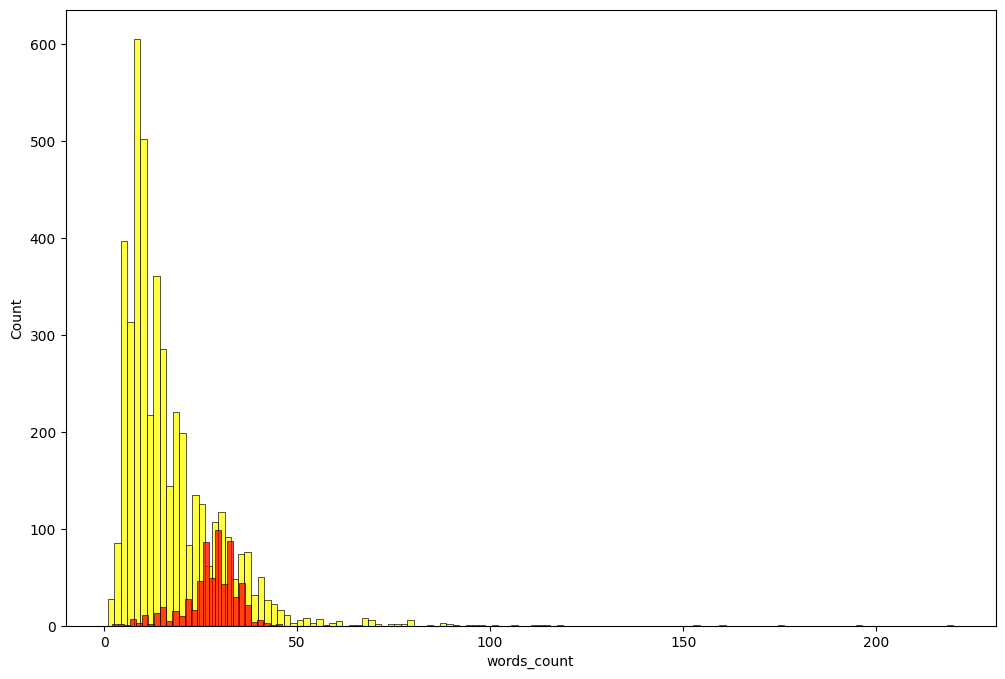

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['words_count'],color='yellow')
sns.histplot(df[df['target']==1]['words_count'],color='red')

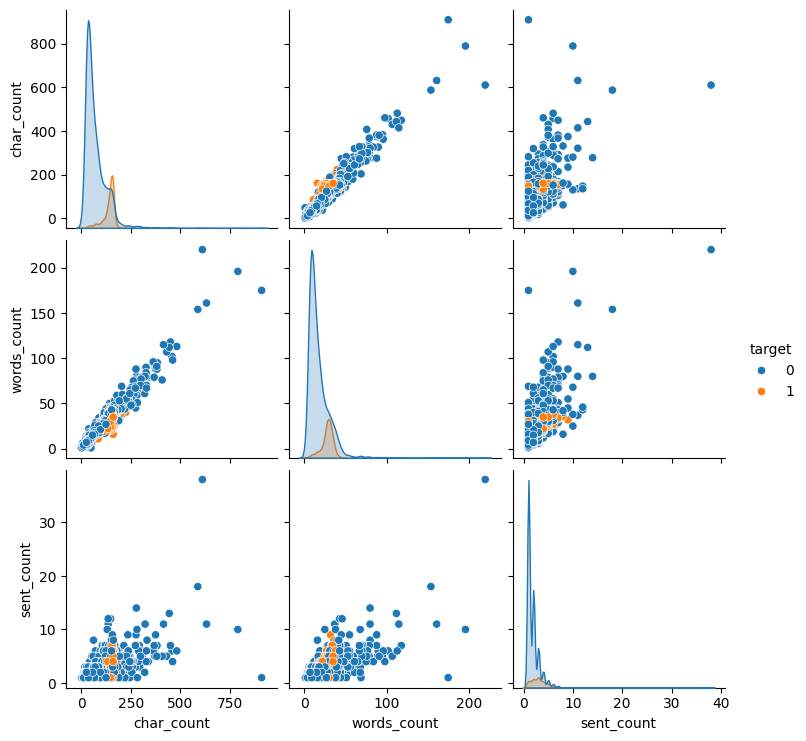

In [28]:
 sns.pairplot(df,hue='target')

In [ ]:
sns.heatmap(df.corr(),annot=True)

# 3. DATA PREPROCESSING
* Lower case data
* Tokenization
* Removing special characters
* Removin stop words and punctautions
* Stemming

In [33]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
import string
def transform_mails(mails):
    mails=mails.lower()
    mails=nltk.word_tokenize(mails)
    
    y=[]
    for i in mails:
        if i.isalnum():
            y.append(i)
    mails = y[:]
    y.clear()
    
    for i in mails:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    
    mails=y[:]
    y.clear()
    
    for i in mails:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [35]:
df['mails'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [38]:
df['transformed_mails']=df['mails'].apply(transform_mails)
df.sample(5)

,target,mails,char_count,words_count,sent_count
5294,1,XMAS iscoming & ur awarded either å£500 CD gif...,157,24,1
2379,0,"Good evening Sir, hope you are having a nice d...",482,113,6
4180,0,"Ok da, i already planned. I wil pick you.",41,12,2
152,0,Ok... Ur typical reply...,25,6,1
3779,0,Then ur physics get a-?,23,6,1


In [39]:
#pip install wordcloud

In [44]:
#getting most frequent used words in spam mails
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500, min_font_size=10,background_color='white')
plt.figure(figsize=(15,6))
plt.imshow(wc)

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [47]:
ham_wc=wc.generate(df[df['target']==0]['transformed_mails'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [ ]:
# to get the top 30 most used words in spam mails
spam_corpus=[]
for i in df[df['target']==1]['transformed_mails'].tolist():
    for word in i.split():
        spam_corpus.append(word)
len(spam_corpus)

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(10)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# to get the top 30 most used words in ham mails
ham_corpus=[]
for i in df[df['target']==0]['transformed_mails'].tolist():
    for word in i.split():
        ham_corpus.append(word)
len(ham_corpus)

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(10)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x=tfidf.fit_transform(df['transformed_mails']).toarray()

In [ ]:
x.shape

In [ ]:
y=df['target'].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gm=GaussianNB()
mm=MultinomialNB()
bm=BernoulliNB()
gm.fit(x_train,y_train)
y_pred1 = gm.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

In [ ]:
mm.fit(x_train,y_train)
y_pred2 = mm.predict(x_test)
print(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)*100)

In [ ]:
bm.fit(x_train,y_train)
y_pred3 = bm.predict(x_test)
print(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)*100)

In [ ]:
# tfidf --> multinomialNB 
#IMPROVEMENT
# max_feature=3000
# To generate the model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mm,open('model.pkl', 'wb'))